<a href="https://colab.research.google.com/github/rukmals/Predicting_Heart_Disease/blob/main/Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from matplotlib import rcParams

## Load the data

In [ ]:
# Only 14 attributes used:
# 1. #3 (age)
# 2. #4 (sex)
# 3. #9 (cp)
# 4. #10 (trestbps)
# 5. #12 (chol)
# 6. #16 (fbs)
# 7. #19 (restecg)
# 8. #32 (thalach)
# 9. #38 (exang)
# 10. #40 (oldpeak)
# 11. #41 (slope)
# 12. #44 (ca)
# 13. #51 (thal)
# 14. #58 (num) (the predicted attribute)

In [2]:
file_path = "/content/drive/MyDrive/Predicting_Heart_Disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp','trestbps', 'chol','fbs', 'restecg', 'thalach','exang', 'oldpeak','slope', 'ca','thal','label']
disease_data = pd.read_csv(file_path, delimiter=",",header=None)
disease_data.columns = column_names

## Exploring the Data

In [3]:
disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
disease_data.shape

(303, 14)

In [5]:
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  label     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [7]:
disease_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [8]:
disease_data['cp'].unique()

array([1., 4., 3., 2.])

<Axes: >

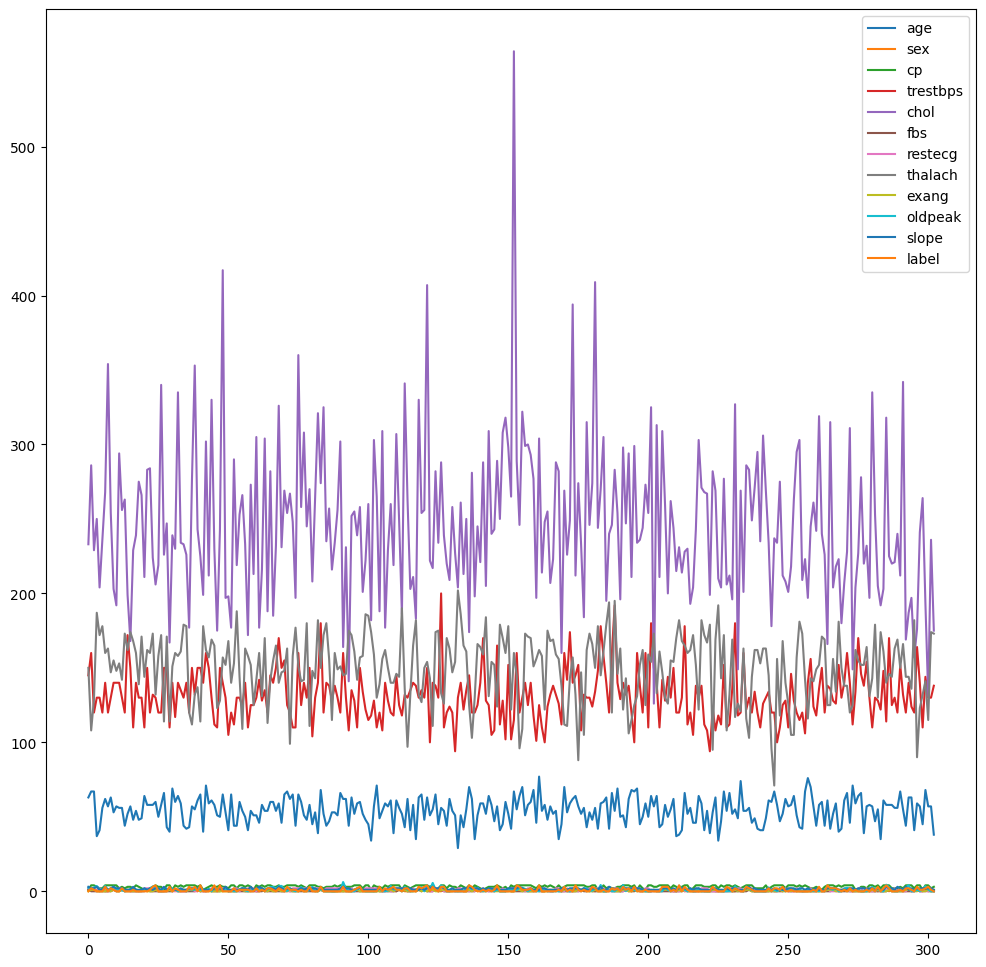

In [9]:
disease_data.plot(figsize = (12, 12 ))

<ipython-input-10-677fdbc128c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(disease_data.corr(),annot=True)


<Axes: >

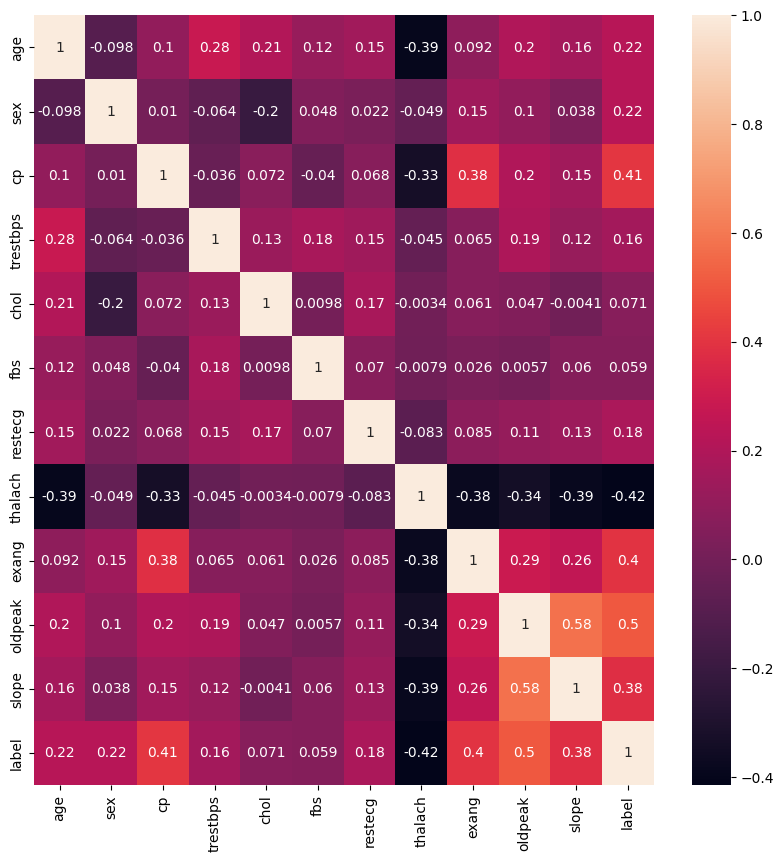

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(disease_data.corr(),annot=True)

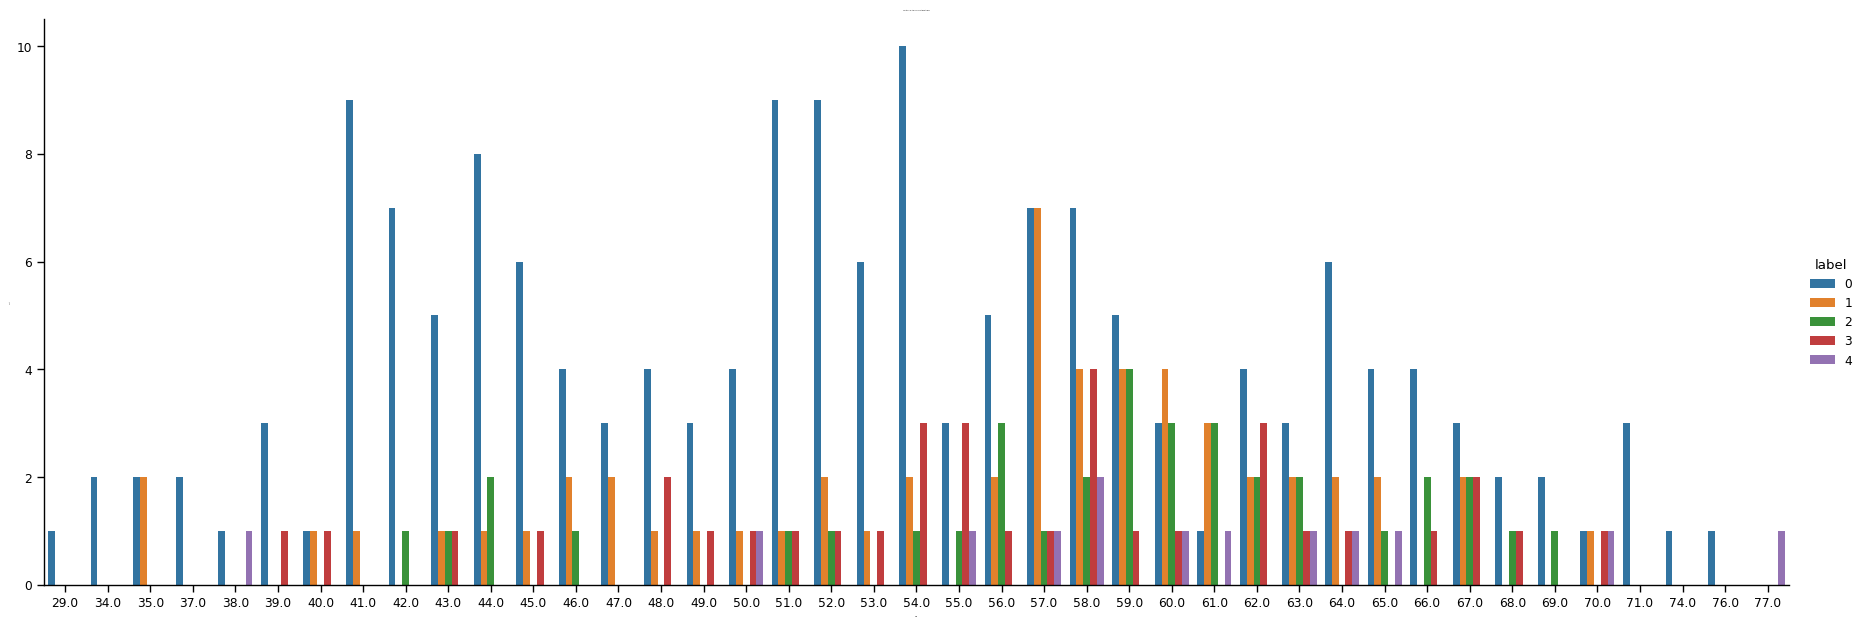

In [11]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 1,"axes.titlesize": 1,"axes.labelsize": 1}) 
sns.catplot(kind = 'count', data = disease_data, x = 'age', hue = 'label', height=6, aspect=3,order = disease_data['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

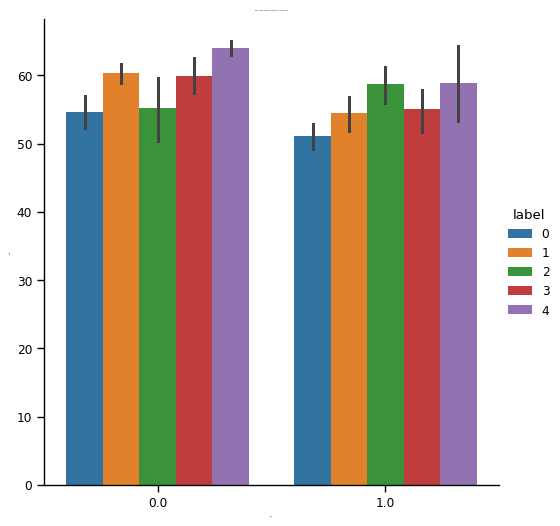

In [12]:
# barplot of age vs sex with hue = label
sns.catplot(kind = 'bar', data = disease_data, y = 'age', x = 'sex', hue = 'label')
plt.title('Distribution of age vs sex with the target class')
plt.show()

## Exploring Categorical Data

In [13]:
disease_data_categorical = disease_data.select_dtypes(include=['object'])

In [14]:
disease_data_categorical.head()

,ca,thal
0,0.0,6.0
1,3.0,3.0
2,2.0,7.0
3,0.0,3.0
4,0.0,3.0


In [15]:
disease_data_categorical.describe()

,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


In [16]:
disease_data_categorical['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [17]:
disease_data_categorical['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [18]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

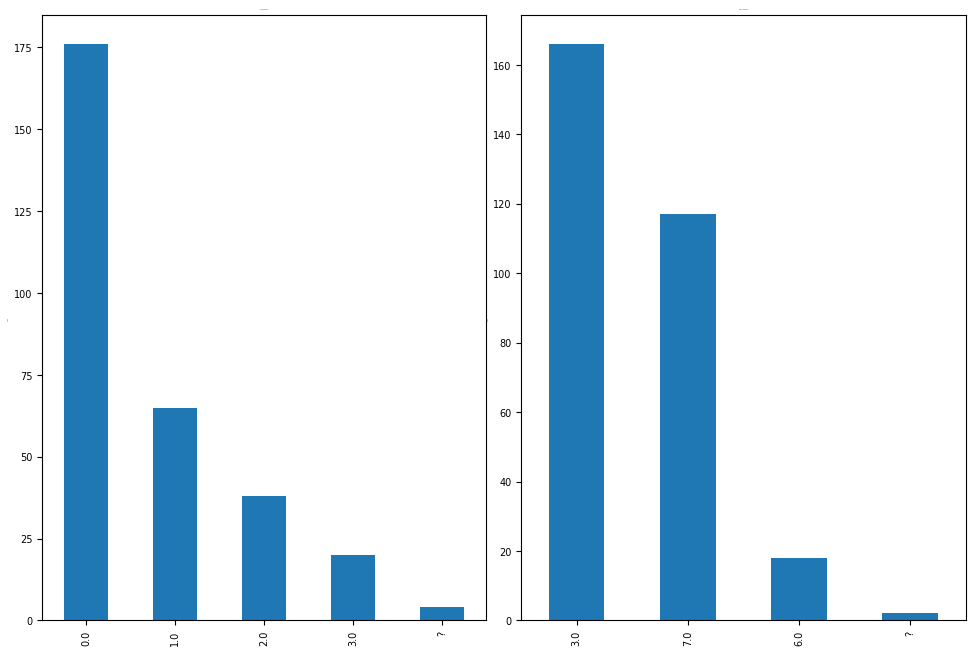

In [19]:
plotPerColumnDistribution(disease_data_categorical, 2, 2)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### **Replace ? data by most frequent data**

In [20]:
disease_data.loc[disease_data['ca']=='?','ca'] = '0.0'

In [21]:
disease_data.ca.unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [22]:
disease_data.loc[disease_data['thal']=='?','thal'] = '3.0'

In [23]:
disease_data.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## Analysing Target

<Axes: xlabel='label', ylabel='count'>

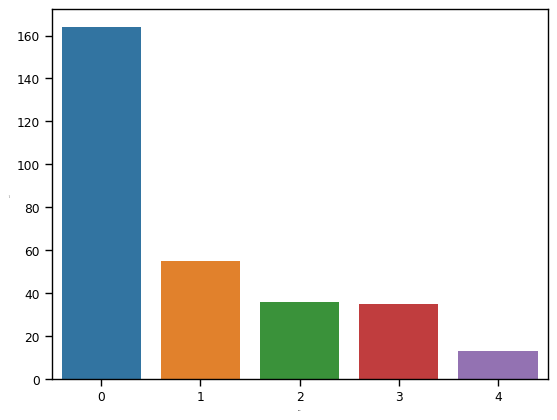

In [24]:
sns.countplot(x='label', data=disease_data)

#### **convert this problem to 0-1 classification model**

In [193]:
disease_data_copy = disease_data.copy()

In [194]:
disease_data_copy.loc[(disease_data_copy['label'] >= 1) & (disease_data_copy['label'] < 5)  , 'label'] = 1

<Axes: xlabel='label', ylabel='count'>

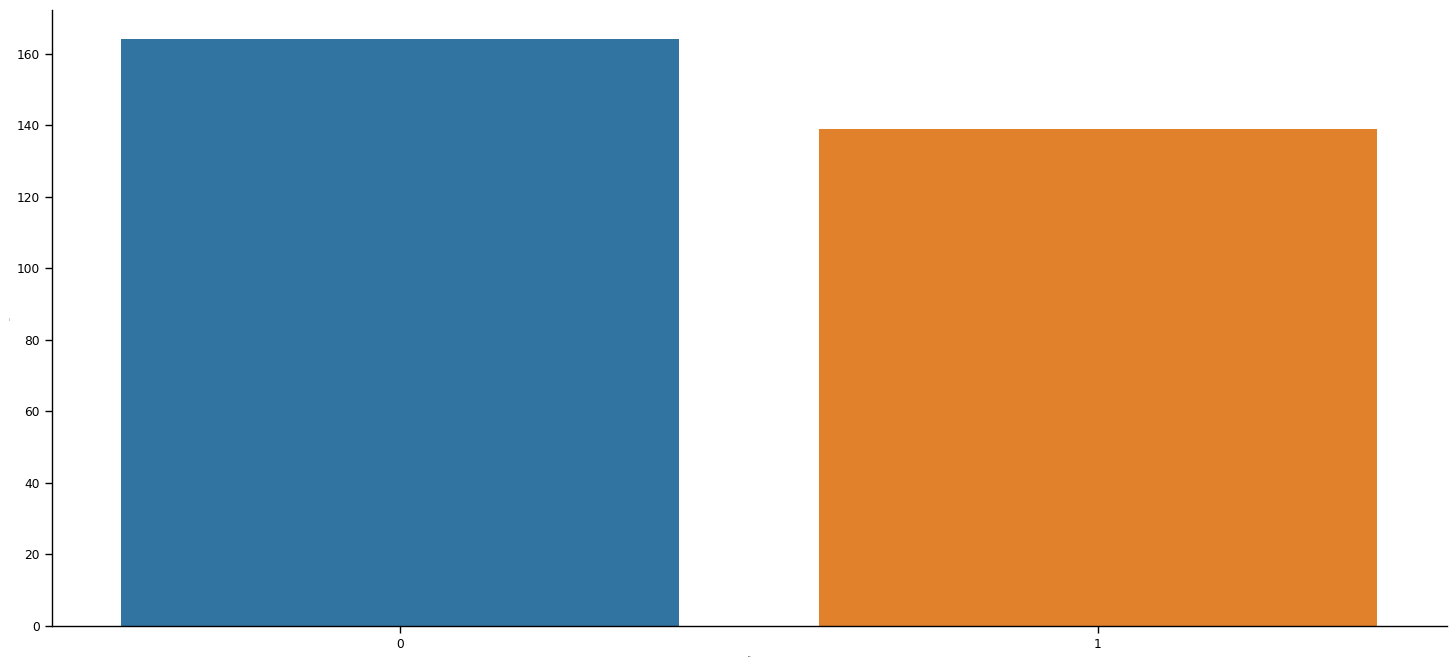

In [195]:
sns.countplot(x='label', data=disease_data_copy)

In [196]:
disease_data_copy['label'].value_counts()

0    164
1    139
Name: label, dtype: int64

In [197]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = disease_data_copy[(disease_data_copy['label']==0)] 
df_minority = disease_data_copy[(disease_data_copy['label']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 164, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
disease_data_copy_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [188]:
disease_data_copy_upsampled['label'].value_counts()

1    164
0    164
Name: label, dtype: int64

In [191]:
disease_data_copy_upsampled.shape

(328, 14)

In [198]:
disease_data_copy_upsampled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
231,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0,1
206,58.0,1.0,4.0,128.0,259.0,0.0,2.0,130.0,1.0,3.0,2.0,2.0,7.0,1
37,57.0,1.0,4.0,150.0,276.0,0.0,2.0,112.0,1.0,0.6,2.0,1.0,6.0,1
237,46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0,1
157,58.0,1.0,4.0,125.0,300.0,0.0,2.0,171.0,0.0,0.0,1.0,2.0,7.0,1


## Model Development

#### **Random Forest**

In [199]:
train_data_frame = disease_data_copy_upsampled.drop(['label'],axis = 1)
labels_train = disease_data_copy_upsampled.label

In [200]:
X_train, X_test, y_train, y_test = train_test_split(train_data_frame, labels_train, test_size=0.2, random_state=42)

In [201]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(262, 13)

In [186]:
clf_RF=RandomForestClassifier(criterion='entropy', n_estimators = 2000,min_samples_split=8,random_state=42,verbose=200)#RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0, max_depth=12,min_samples_leaf=10)
clf_RF.fit(X_train_scaled,y_train)

y_pred_RF=clf_RF.predict(X_test_scaled)
y_train_pred_RF = clf_RF.predict(X_train_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 2000
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 2000
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 2000
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 2000
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
building tree 5 of 2000
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 6 of 2000
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
building tree 7 of 2000
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
building tree 8 of 2000
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
building tree 9 of 2000
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s re

In [187]:
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_RF))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_RF))

train accuracy=  0.9628099173553719
test accuracy=  0.8852459016393442


In [188]:
confusion_matrix(y_pred_RF, y_test)

array([[27,  5],
       [ 2, 27]])

##### **Use Grid Search**

In [235]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators' : [300,500,1000],
    'min_samples_split' : [8,10,12],
    'max_features' : ['sqrt','log2'],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

cv = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [300, 500, 1000]})

In [236]:
cv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [237]:
clf_RF_1=RandomForestClassifier(criterion='entropy',max_depth=10, max_features = 'sqrt',min_samples_leaf=1,n_estimators = 1000,min_samples_split=10,random_state=42,verbose=200)#RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0, max_depth=12,min_samples_leaf=10)
clf_RF_1.fit(X_train_scaled,y_train)

y_pred_RF_1=clf_RF_1.predict(X_test_scaled)
y_train_pred_RF_1 = clf_RF_1.predict(X_train_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 1000
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 1000
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 1000
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 1000
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
building tree 5 of 1000
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 6 of 1000
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
building tree 7 of 1000
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
building tree 8 of 1000
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
building tree 9 of 1000
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s re

In [238]:
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_RF_1))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_RF_1))

train accuracy=  0.9618320610687023
test accuracy=  0.9696969696969697


In [239]:
confusion_matrix(y_pred_RF_1, y_test)

array([[30,  0],
       [ 2, 34]])

#### **GradientBoostingClassifier**

In [229]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=14,max_features=0.5,min_samples_leaf=14,verbose=5)

GB.fit(X_train_scaled, y_train)  

      Iter       Train Loss   Remaining Time 
         1           1.3357            1.03s
         2           1.2890            0.63s
         3           1.2394            0.48s
         4           1.1975            0.41s
         5           1.1594            0.36s
         6           1.1274            0.33s
         7           1.0940            0.30s
         8           1.0577            0.28s
         9           1.0241            0.27s
        10           0.9934            0.25s
        11           0.9660            0.24s
        12           0.9371            0.23s
        13           0.9145            0.22s
        14           0.8929            0.22s
        15           0.8726            0.21s
        16           0.8505            0.20s
        17           0.8277            0.20s
        18           0.8081            0.19s
        19           0.7909            0.19s
        20           0.7721            0.19s
        21           0.7535            0.18s
        2

GradientBoostingClassifier(learning_rate=0.05, max_depth=14, max_features=0.5,
                           min_samples_leaf=14, verbose=5)

In [230]:
y_pred_GB=GB.predict(X_test_scaled)
y_train_pred_GB = GB.predict(X_train_scaled)
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_GB))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_GB))

train accuracy=  0.9885496183206107
test accuracy=  0.9696969696969697


In [231]:
confusion_matrix(y_pred_GB, y_test)

array([[30,  0],
       [ 2, 34]])

#### **CatBoost**

In [222]:
%%capture
!pip install catboost

In [223]:
from catboost import CatBoostClassifier

In [224]:
X_train_CB, X_test_CB, y_train_CB, y_test_CB = train_test_split(train_data_frame, labels_train, test_size=0.2, random_state=42)

In [225]:
X_train_CB.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
30,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0
79,58.0,1.0,4.0,150.0,270.0,0.0,2.0,111.0,1.0,0.8,1.0,0.0,7.0
126,56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,2.0,7.0
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0
211,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0


In [226]:
params= {'loss_function':'Logloss',
          'verbose': 500,
           'learning_rate':0.0008,
           'random_seed':42,
          'iterations':2000,
          'l2_leaf_reg':5,
          'depth':6
         }

model_catboost = CatBoostClassifier(**params)
model_catboost.fit(X_train_CB,y_train_CB)

0:	learn: 0.6924991	total: 49.7ms	remaining: 1m 39s
500:	learn: 0.4827028	total: 1.17s	remaining: 3.5s
1000:	learn: 0.3727769	total: 2.35s	remaining: 2.34s
1500:	learn: 0.3080832	total: 3.38s	remaining: 1.12s
1999:	learn: 0.2640618	total: 4.38s	remaining: 0us


In [227]:
y_train_pred_CB = model_catboost.predict(X_train_CB)
y_pred_CB = model_catboost.predict(X_test_CB)
print("train accuracy= ",metrics.accuracy_score(y_train_CB, y_train_pred_CB))
print("test accuracy= ", metrics.accuracy_score(y_test_CB, y_pred_CB))

train accuracy=  0.9580152671755725
test accuracy=  0.9696969696969697


In [228]:
confusion_matrix(y_pred_CB, y_test_CB)

array([[30,  0],
       [ 2, 34]])

#### **Tensorflow RandomForest**

##### **Training a model with automated hyper-parameter tuning and automatic definition of the hyper-parameters**

In [211]:
%%capture
pip install tensorflow_decision_forests

In [212]:
import tensorflow_decision_forests as tfdf

In [213]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(disease_data_copy_upsampled)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

223 examples in training, 105 examples for testing.


In [214]:
label = "label"
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [215]:
# Create a Random Search tuner with 50 trials and automatic hp configuration.
tuner_2 = tfdf.tuner.RandomSearch(num_trials=50, use_predefined_hps=True)

# Define and train the model.
model_2 = tfdf.keras.RandomForestModel(tuner=tuner_2)
model_2.fit(train_ds, verbose=2)

Use /tmp/tmpvjyrxh6w as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'age': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'cp': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'trestbps': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'chol': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'fbs': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'restecg': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'thalach': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'exang': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'oldpeak': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64>, 'slope': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'ca': <tf.Tensor 'data_11:0' shape=(None,) dtype=string>, 'thal': <tf.Tensor 'data_12:0' shape=(None,) dtype=string>}
Label: Tensor("data_13:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features

[INFO 23-05-03 04:56:39.8315 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-05-03 04:56:39.8316 UTC kernel.cc:774] Collect training examples
[INFO 23-05-03 04:56:39.8316 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-05-03 04:56:39.8324 UTC kernel.cc:393] Number of batches: 1
[INFO 23-05-03 04:56:39.8324 UTC kernel.cc:394] Number of examples: 223
[INFO 23-05-03 04:56:39.8326 UTC kernel.cc:794] Training dataset:
Number of records: 223
Number of columns: 14

Number of columns by type:
	NUMERICAL: 11 (78.5714%)
	CATEGORICAL: 3 (21.4286%)

Columns:

NUMERICAL: 11 (78.5714%)
	1: "age" NUMERICAL mean:53.9327 min:34 max:74 sd:9.16172


Model trained in 0:02:17.625407
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [216]:
model_2.compile(["accuracy"])
tuned_test_accuracy = model_2.evaluate(test_ds, return_dict=True, verbose=0)["accuracy"]
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {tuned_test_accuracy:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.8381


In [217]:
# Display the tuning logs.
tuning_logs_2 = model_2.make_inspector().tuning_logs()
tuning_logs_2.head()

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,winner_take_all,max_depth,min_examples
0,0.856502,5.945141,False,SPARSE_OBLIQUE,5.0,MIN_MAX,BINARY,CART,true,12,40
1,0.860987,13.121788,False,SPARSE_OBLIQUE,5.0,MIN_MAX,CONTINUOUS,CART,true,16,1
2,0.852018,15.612332,False,SPARSE_OBLIQUE,4.0,MIN_MAX,CONTINUOUS,RANDOM,true,16,10
3,0.865471,20.484298,False,SPARSE_OBLIQUE,1.0,MIN_MAX,CONTINUOUS,CART,true,20,10
4,0.874439,22.355875,False,SPARSE_OBLIQUE,4.0,STANDARD_DEVIATION,BINARY,CART,true,25,2


In [218]:
tuning_logs_2.loc[tuning_logs_2.best==True] #The single rows with best=True is the one used in the final model.

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,winner_take_all,max_depth,min_examples
41,0.892377,107.045676,True,SPARSE_OBLIQUE,5.0,NONE,CONTINUOUS,RANDOM,true,16,2


In [219]:
# Best hyper-parameters.
tuning_logs_2[tuning_logs_2.best].iloc[0]

score                                             0.892377
evaluation_time                                 107.045676
best                                                  True
split_axis                                  SPARSE_OBLIQUE
sparse_oblique_projection_density_factor               5.0
sparse_oblique_normalization                          NONE
sparse_oblique_weights                          CONTINUOUS
categorical_algorithm                               RANDOM
winner_take_all                                       true
max_depth                                               16
min_examples                                             2
Name: 41, dtype: object

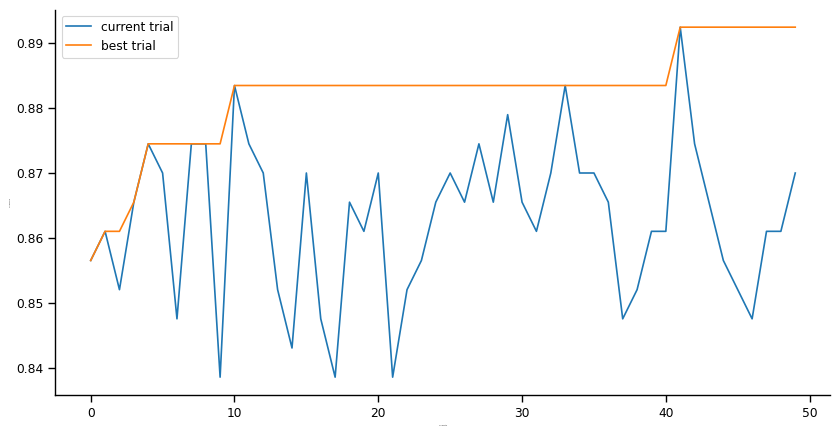

In [220]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logs_2["score"], label="current trial")
plt.plot(tuning_logs_2["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

#### **Terraform Neural Network**

In [202]:
import tensorflow as tf
from tensorflow import keras

input_layer = tf.keras.layers.Input(shape=(13,), name='input_layer')
layer_1 = tf.keras.layers.Dense(64, name='layer_1',activation='relu')(input_layer)
layer_2 = tf.keras.layers.Dense(32, name='layer_2',activation='relu')(layer_1)
layer_3 = tf.keras.layers.Dense(16, name='layer_3',activation='relu')(layer_2)
output_layer = tf.keras.layers.Dense(1,  name='layer_4',activation='sigmoid')(layer_3)
model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(lr=0.04),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
print('\nModel Training')
history = model.fit(X_train_scaled, y_train, epochs=30)

print('\nModel Testing')
test_loss = model.evaluate(X_test_scaled, y_test)



Model Training
Epoch 1/30
9/9 [==============================] - 1s 4ms/step - loss: 0.6525 - accuracy: 0.5649 - precision: 0.5345 - recall: 0.9538
Epoch 2/30
9/9 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.7099 - precision: 0.6452 - recall: 0.9231
Epoch 3/30
9/9 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.7672 - precision: 0.6994 - recall: 0.9308
Epoch 4/30
9/9 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7939 - precision: 0.7317 - recall: 0.9231
Epoch 5/30
9/9 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.8435 - precision: 0.7947 - recall: 0.9231
Epoch 6/30
9/9 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8702 - precision: 0.8429 - recall: 0.9077
Epoch 7/30
9/9 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8702 - precision: 0.8750 - recall: 0.8615
Epoch 8/30
9/9 [==============================] - 0s 

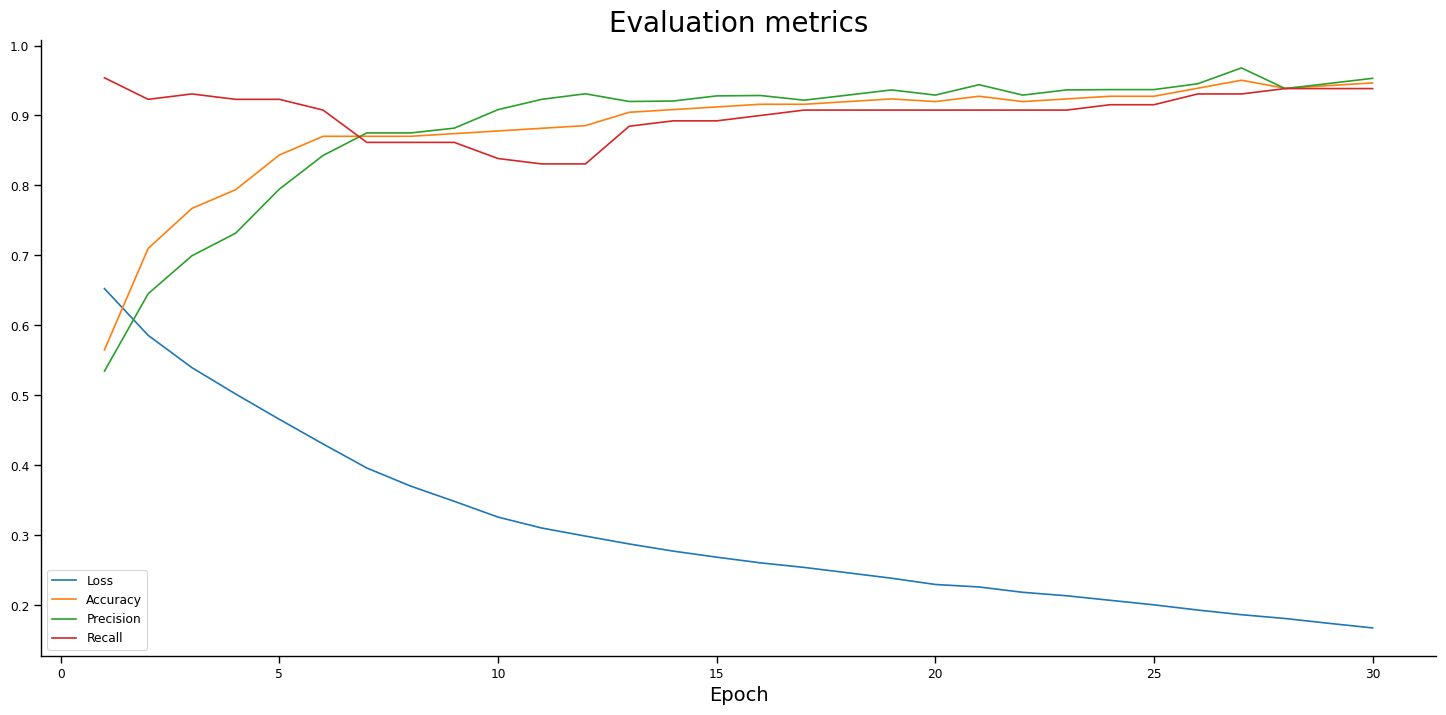

In [204]:
epochs = 30
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, epochs+1), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, epochs+1), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, epochs+1), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, epochs+1), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [205]:
predictions = model.predict(X_test_scaled)
predictions

3/3 [==============================] - 0s 7ms/step


array([[0.03797949],
       [0.9949689 ],
       [0.35086194],
       [0.98949146],
       [0.82764685],
       [0.07243878],
       [0.3075223 ],
       [0.56445545],
       [0.10088082],
       [0.99398446],
       [0.38788107],
       [0.02245631],
       [0.02283074],
       [0.9842967 ],
       [0.05404669],
       [0.99137217],
       [0.9414865 ],
       [0.9999982 ],
       [0.98713446],
       [0.8695078 ],
       [0.80813473],
       [0.03319294],
       [0.90585726],
       [0.04482945],
       [0.95388746],
       [0.13645934],
       [0.99928766],
       [0.89691174],
       [0.98713446],
       [0.03536489],
       [0.0201438 ],
       [0.03872521],
       [0.16163875],
       [0.23145999],
       [0.03623727],
       [0.0180885 ],
       [0.9919295 ],
       [0.8695078 ],
       [0.99990076],
       [0.04035731],
       [0.03781371],
       [0.9997297 ],
       [0.9832848 ],
       [0.04890019],
       [0.9996874 ],
       [0.24480078],
       [0.8558581 ],
       [0.024

ROC_AUC Score :  0.9852941176470589
Function for ROC_AUC Score :  0.9852941176470589
Threshold value is: 0.6478027


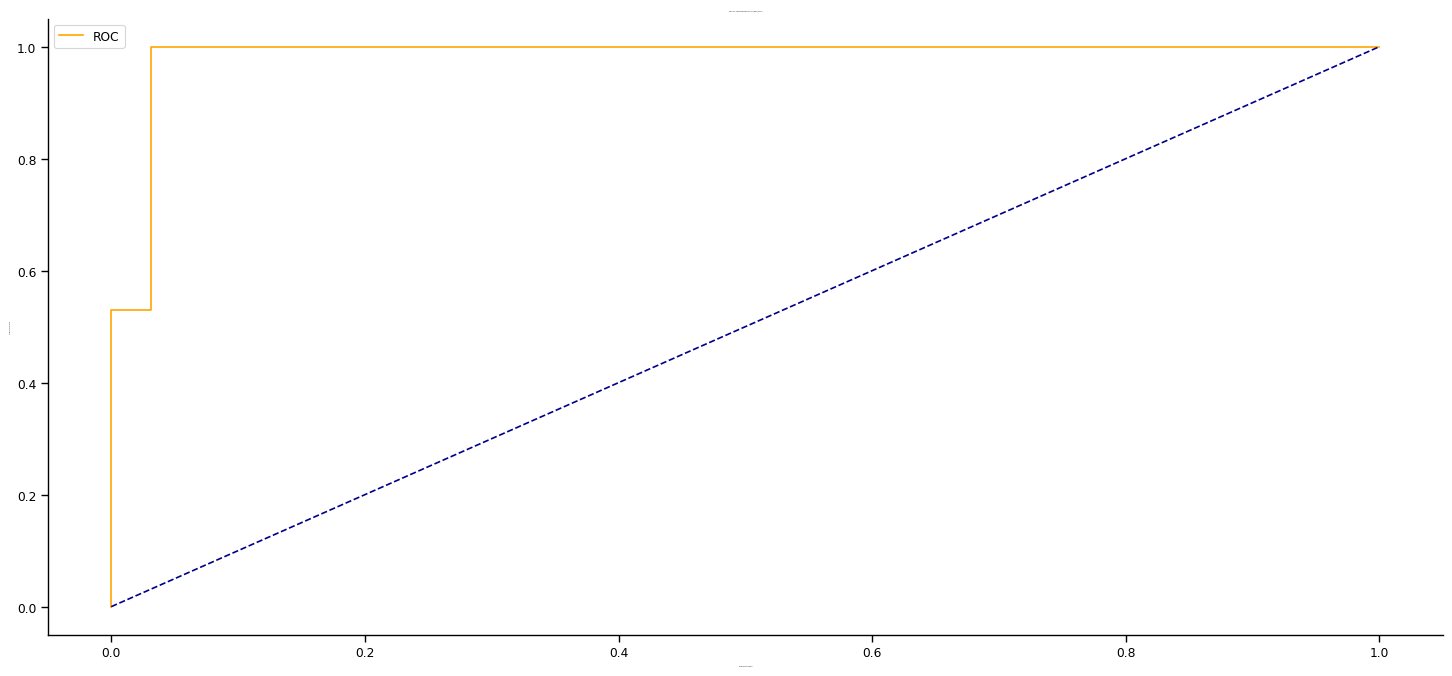

In [206]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(y_test, predictions)) # Function present
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [207]:
prediction_classes = [
    1 if prob > optimal_threshold else 0 for prob in np.ravel(predictions)
]
prediction_classes[:20]

[0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]

In [208]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_classes))

[[31  1]
 [ 1 33]]


In [209]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.97
Precision: 0.97
Recall: 0.97


In [86]:
with tf.GradientTape() as tape:
    inputs = tf.constant(X_train_scaled)
    tape.watch(inputs)
    outputs = model(inputs)
grads = tape.gradient(outputs, inputs)

# Calculate the feature importances by taking the mean absolute value of the gradients
importances = np.mean(np.abs(grads), axis=0)

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'feature': disease_data.columns[:-1], 'importance': importances.reshape(-1)})

# Sort the features by importance and display the results
importance_df = importance_df.sort_values(by='importance', ascending=False)
print(importance_df)

     feature  importance
11        ca    0.107543
1        sex    0.059532
2         cp    0.052378
10     slope    0.047843
9    oldpeak    0.042246
4       chol    0.040465
0        age    0.037109
12      thal    0.036255
8      exang    0.033658
6    restecg    0.029187
5        fbs    0.027691
7    thalach    0.025589
3   trestbps    0.025212


<Axes: ylabel='feature'>

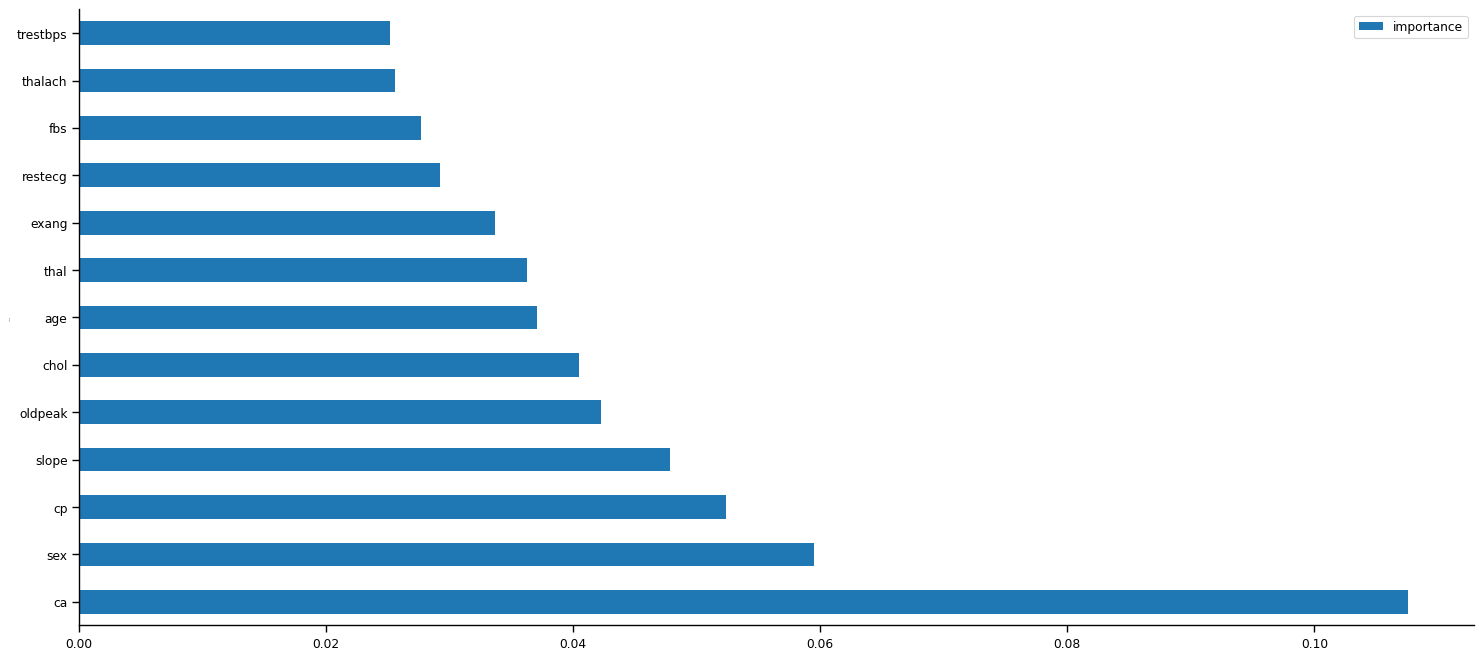

In [87]:
importance_df.plot.barh(x='feature', y='importance')